In [107]:
import pandas as pd
import scipy
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import signal
from scipy.signal import find_peaks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [156]:
#Загружаем сигнал ЭКГ
path_to_signals0 = '/content/drive/MyDrive/exams_part0.hdf5'
signals_folder0 = h5py.File(path_to_signals0, 'r')
ecg_data = np.array(signals_folder0['tracings'][2030,:,:])
ecg_signal = ecg_data[:,0]
fs = 400

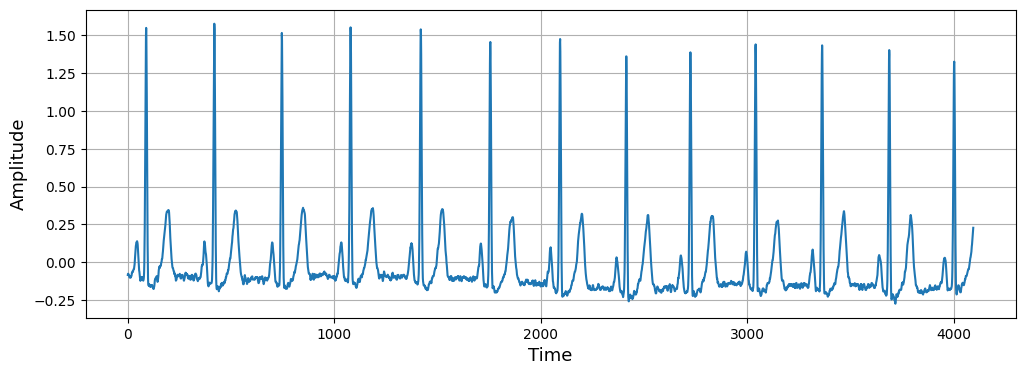

In [157]:
# Визуализируем сигнал
plt.figure(figsize=(12, 4))
plt.plot(ecg_signal)
plt.xlabel('Time',size = 13)
plt.ylabel('Amplitude',size = 13)
plt.grid(True)

In [134]:
peak_filter = np.sin(np.linspace(0.5 * np.pi, 1.5 * np.pi, 15))                                                     #строим синусоидальный фильтр
modified_signal = np.correlate(ecg_signal, peak_filter, mode = "same")      #считаем взаимную корреляцию между фильтром и исходным сигналом

Text(0, 0.5, 'Amplitude')

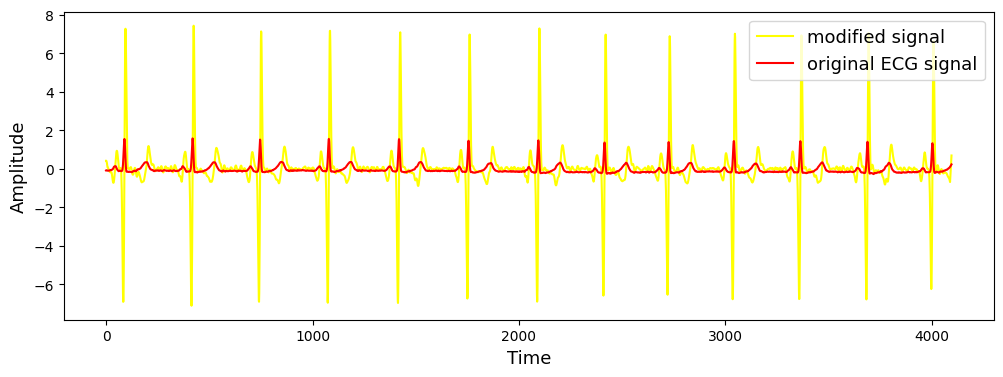

In [159]:
plt.figure(figsize=(12, 4))
plt.plot(modified_signal, label = 'modified signal', color = 'yellow')
plt.plot(ecg_signal, label = 'original ECG signal', color = 'red')
plt.legend(prop = {'size':13})
plt.xlabel('Time',size = 13)
plt.ylabel('Amplitude',size = 13)

In [109]:
distance = fs * 60 / 220
rr_peaks, _ = find_peaks(modified_signal, distance = distance)      # Выбираем из обработанного фильтром сигнала максимальные пики
dif = scipy.stats.zscore(modified_signal)                           # Находим delta - отклонение каждого сигнала от среднего значения
rr_peaks = np.array([peak for peak in rr_peaks if dif[peak] > 3])   # Выбираем сигналы, которые отличаются более чем на 3 delta

Text(0, 0.5, 'Amplitude')

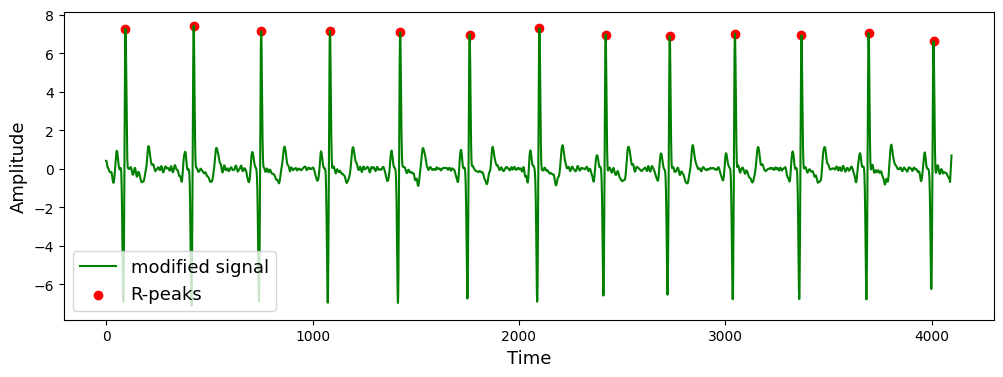

In [126]:
plt.figure(figsize=(12, 4))
plt.plot(modified_signal, label = 'modified signal', color = 'green')
plt.scatter(rr_peaks, modified_signal[rr_peaks], label = 'R-peaks', color = 'red')
plt.legend(prop = {'size':13})
plt.xlabel('Time',size = 13)
plt.ylabel('Amplitude', size = 13)

In [133]:
median_distance = np.median(np.diff(rr_peaks))                      # Находим медианное значение расстояний между R пиками
heart_rate = 60 * fs / median_distance                               # Считаем ЧСС
print('Heart rate:', round(hart_rate, 2), 'beats per minute')

Hart rate: 73.62 beats per minute


In [143]:
# Функция для вычисления ЧСС

def heart_rate_calculation(ecg_signal, fs):
  peak_filter = np.sin(np.linspace(0.5 * np.pi, 1.5 * np.pi, 15))
  modified_signal = np.correlate(ecg_signal, peak_filter, mode = "same")

  r_peaks, _ = find_peaks(modified_signal, distance = 120)

  dif = scipy.stats.zscore(modified_signal)
  r_peaks = np.array([peak for peak in r_peaks if dif[peak] > 3])

  median_distance = np.median(np.diff(rr_peaks))

  heart_rate = 60 * fs / median_distance
  return heart_rate

In [145]:
# Подсчёт ЧСС по всем отведениям
lead_results = []
for i in range(12) :
  hr = heart_rate_calculation(ecg_data[i], fs)
  lead_results.append(hr)
print(lead_results)

[73.61963190184049, 73.61963190184049, 73.61963190184049, 73.61963190184049, 73.61963190184049, 73.61963190184049, 73.61963190184049, 73.61963190184049, 73.61963190184049, 73.61963190184049, 73.61963190184049, 73.61963190184049]


In [146]:
# Функция для нахождения дисперсии
def calculate_deviation_variance(heart_rate_all):
  mean = sum(heart_rate_all) / 12
  deviation_variance = sum((x - mean) ** 2 for x in heart_rate_all) / 12
  return deviation_variance

In [151]:
var = calculate_deviation_variance(lead_results)                  # Если сигнал плохо записан (с сильным шумом или с другими дефектами),
print('Deviation variance:', round(var, 6))                       #  то ЧСС может немного отличаться при вычислении на разных отведениях ЭК

Deviation variance: 0.0
